# Use the House Prices dataset from Kaggle to build a linear regression model to
predict house prices. (Marks 20)

● Load the dataset

● Preprocess the dataset

● Build and train linear regression model

● Evaluate its performance using Mean Square Error (MSE)

##import dataset from kaggle with kaggle.json file

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = [10,5]


In [ ]:


#ignore warnings

import warnings

#set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore" , category = FutureWarning)

In [ ]:
df = pd.read_csv("/content/train.csv", index_col = "Id")

In [ ]:
db = pd.read_csv("/content/test.csv")

In [ ]:
df.head(5)


In [ ]:
df.tail(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


#EDA

In [ ]:
df.shape


(1460, 80)

In [ ]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [ ]:

df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df.duplicated().sum()

NameError: name 'df' is not defined

###The .quantile() method in Pandas is used to calculate the quantile values of a Series or DataFrame. A quantile represents a specific value below which a given fraction of the data falls. It provides a way to understand the distribution of numerical data by dividing it into intervals

In [ ]:
Q1 = df['YearBuilt'].quantile(0.25)


In [ ]:
Q3 = df['YearBuilt'].quantile(0.75)

NameError: name 'df' is not defined

In [ ]:
IQR = Q3-Q1

In [ ]:

print("The interquartile range is: ", IQR)

The interquartile range is:  46.0


In [ ]:

df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:

df.dropna()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False


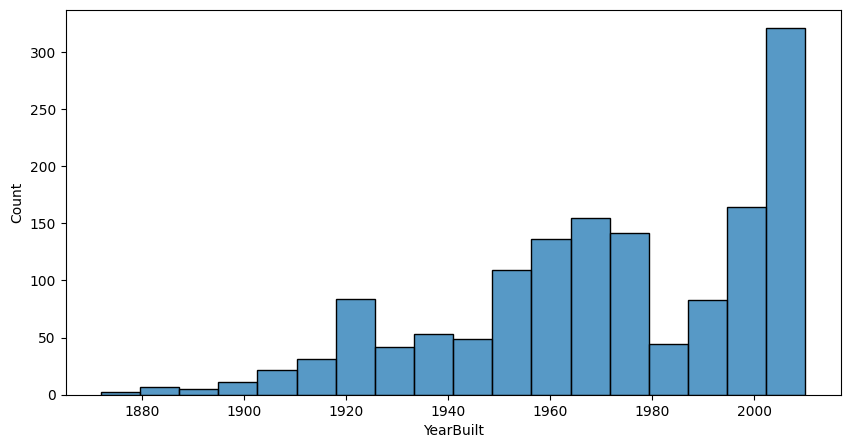

In [ ]:

sns.histplot(df['YearBuilt'],kde =False)
plt.show()


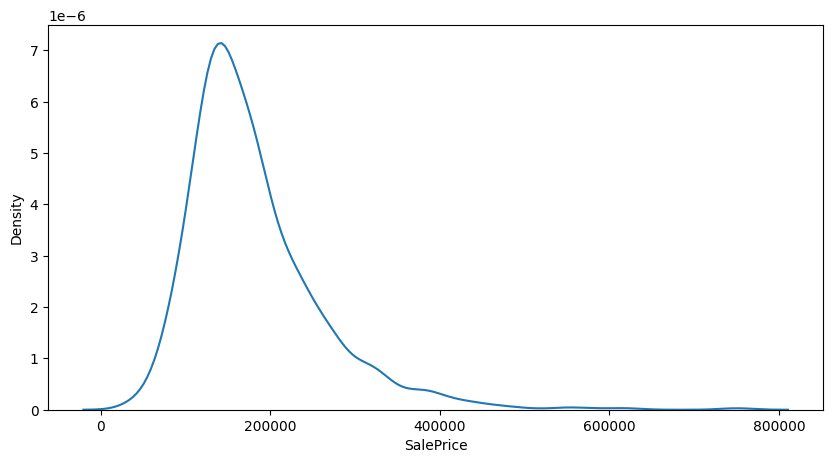

In [ ]:

sns.distplot(df['SalePrice'], hist=False)
plt.show()

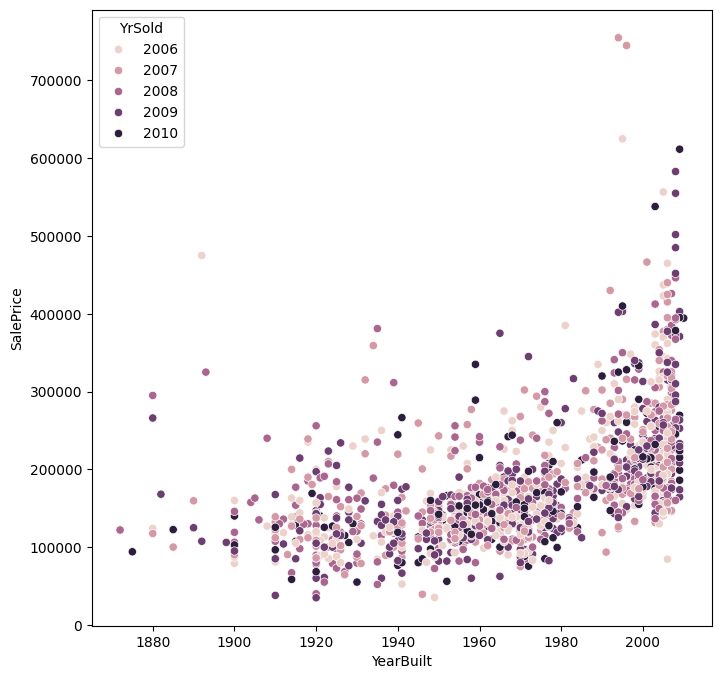

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = "YearBuilt" , y = "SalePrice" , hue = "YrSold" , data = df)
plt.show()

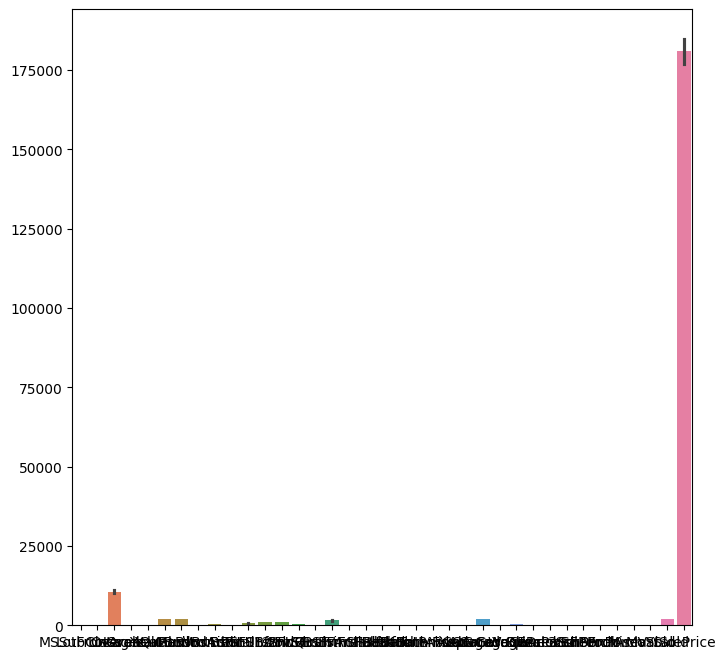

In [ ]:
plt.figure(figsize = (8, 8))
sns.barplot(df)
plt.show()

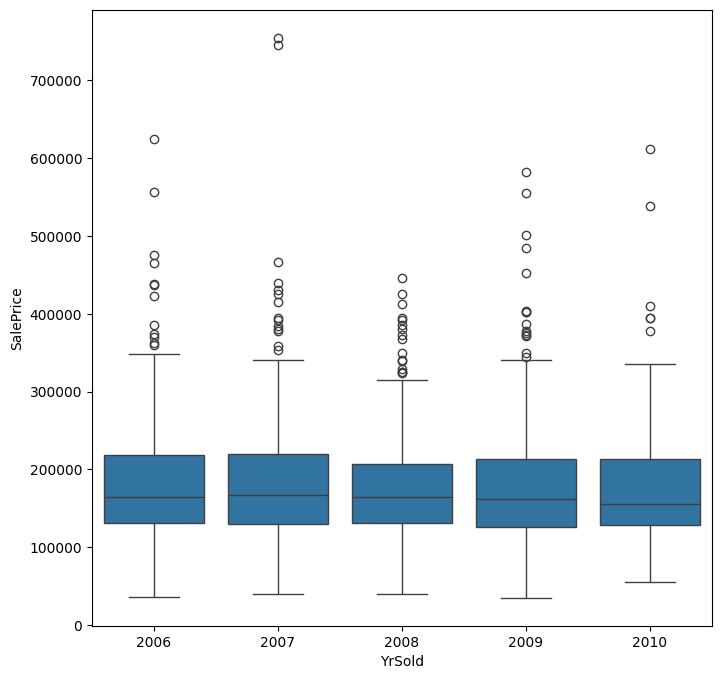

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "YrSold" ,y = "SalePrice" ,data = df)
plt.show()

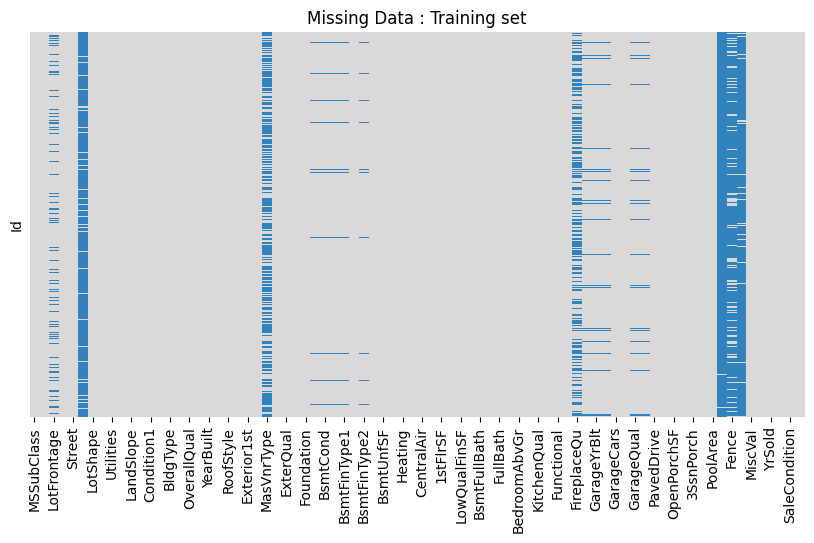

In [ ]:

sns.heatmap(df.isnull(),yticklabels= False ,cbar =False ,cmap = 'tab20c_r')
plt.title('Missing Data : Training set')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


drop missing value

In [ ]:
df.drop(columns=['Alley','MasVnrType','PoolQC','Fence','MiscFeature'], inplace = True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 234, dtype: int64

#Convert onject into Category data type

In [ ]:

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_cols}")

# Convert categorical columns to category data type
for colname in categorical_cols:
    df[colname] =df[colname].astype('category')

Categorical Columns: Index([], dtype='object')


In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


#select features and target varible

In [ ]:
x = df.drop(columns=['SalePrice'],axis = 1)
y = df['SalePrice']

#Use x and y variable to split training data into train and test set

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train ,y_test =train_test_split(x,y, test_size = .20 , random_state = 101)



In [ ]:

df.shape

(1121, 234)

In [ ]:
x_train.shape


(896, 233)

In [ ]:

x_test.shape

(225, 233)

In [ ]:

from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [ ]:
x_transform.shape

(1121, 233)

In [ ]:

y.shape

(1121,)

#Now the train data is perfect for a machine learning algorithm:

1.all the data is numeric

2.
everything is concatenated together




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#create intance of model

model = LinearRegression()

#pass training data into model

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#model predict
y_pred = model.predict(x_test)


In [ ]:

print(y_pred.shape)
print(y_pred)

(225,)
[174052.03792076 121875.97494008 223494.95744634 140647.46860888
 200559.79009949 173094.48034134  94590.11728831 355971.53057432
 103854.57722049 133697.62771502 293930.07497308 588104.30222177
 345755.95872365 127018.53400761 362975.44821455 214557.80363181
 213226.78633547 339988.03363338 214813.92861803  94944.07097053
 130866.06339343 165387.85872829 201082.81689467 256541.31420157
 203459.87268877 150544.49116508 117052.37074979 217733.61919004
 399949.7637574  152567.20602518 208274.65592346 216669.29857037
 126360.12639141 343401.84562445  96466.53820259  92221.26791862
 140851.55451223 160888.04289177 119886.37527144 101184.04914867
 350500.02703211 218747.01001858 144864.20754703 132217.14613938
 141041.28933459 401329.32055899 350912.47254439 125219.3313762
 113085.49377881 176205.09338815 153205.22266624 141327.40916166
 306730.59009544 369644.71633548 148171.05215329 226258.91422442
 134150.29271126 149927.53046308 140294.06566132 211604.1485061
 230971.1020527  126

In [ ]:
#mean_squared_error
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')

#Result

print('--'*30)

#mean_sequared_error(y_test, y_pred)

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

#print("Evalution MEtrics")

print("Mean Squared Error:", mse)
print("Root Mean Squared Error: ",rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 4582615702.882883
Root Mean Squared Error:  67695.01977902719


----------------------------------------------------------------------------------------------

#task no 2:Use the Iris dataset from Kaggle to build a K-Nearest

---

Neighbors (KNN) classifier
to classify iris species. (Marks 20)
● Load the dataset

● Preprocess the dataset

● Build and train KNN classifier

● Evaluate its performance using Accuracy and Confusion Matrix

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

iris_df = pd.read_csv("/content/Iris.csv")

In [ ]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

iris_df.shape


(150, 6)

In [ ]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:

iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#check outliers in dataset features

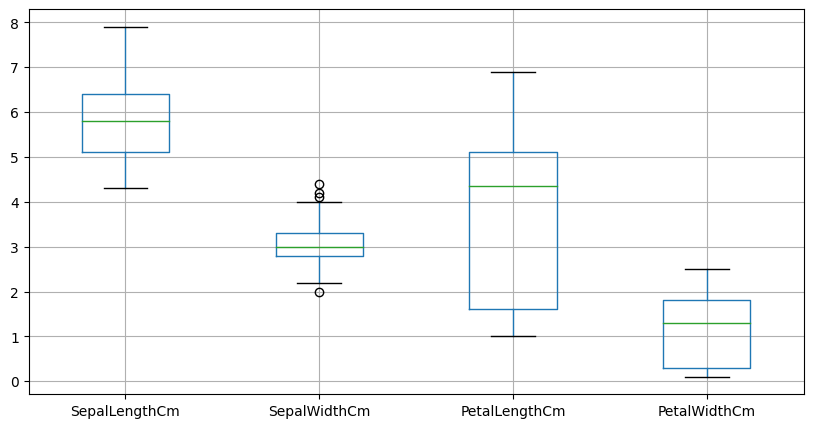

In [ ]:
boxplot = iris_df.boxplot(column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

##AS there is no outlier in features

###As we have species 3 catogires which we have to convert in numeric for out model training we used onehotencode

In [ ]:
df['species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['Species'])

In [ ]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,1,0
1,2,4.9,3.0,1.4,0.2,1,0
2,3,4.7,3.2,1.3,0.2,1,0
3,4,4.6,3.1,1.5,0.2,1,0
4,5,5.0,3.6,1.4,0.2,1,0


#split data  as independent variable and target variable

In [ ]:

# Split the dataset into features and target variable
X = iris_df.drop(columns=['Species'])
y = iris_df['Species']

#Build and train KNN classifier

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33 ,random_state =42)


# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [ ]:

# Make predictions on the test set
y_pred = knn.predict(X_test)


In [ ]:
print(y_pred.shape)
print(y_pred)

(50,)
[2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 2 3 2 2 3 1 3 1 3 3 3 3 3 1 1 1 1 2 1 1 3 2
 1 1 1 3 2 2 1 1 2 3 3 2 3]


###Evaluate its performance using Accuracy and Confusion Matrix

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



#task no 4:Use the Diabetes dataset from Kaggle to build a decision tree regressor to
predict diabetes progression. Train the model and evaluate its performance using Mean
Squared Error (MSE). (Marks 20)

● Load the dataset

● Preprocess the dataset

● Build and train Decision Tree Regressor

● Evaluate its performance using Mean Square Error (MSE)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

#*EDA




In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.duplicated().sum()

0

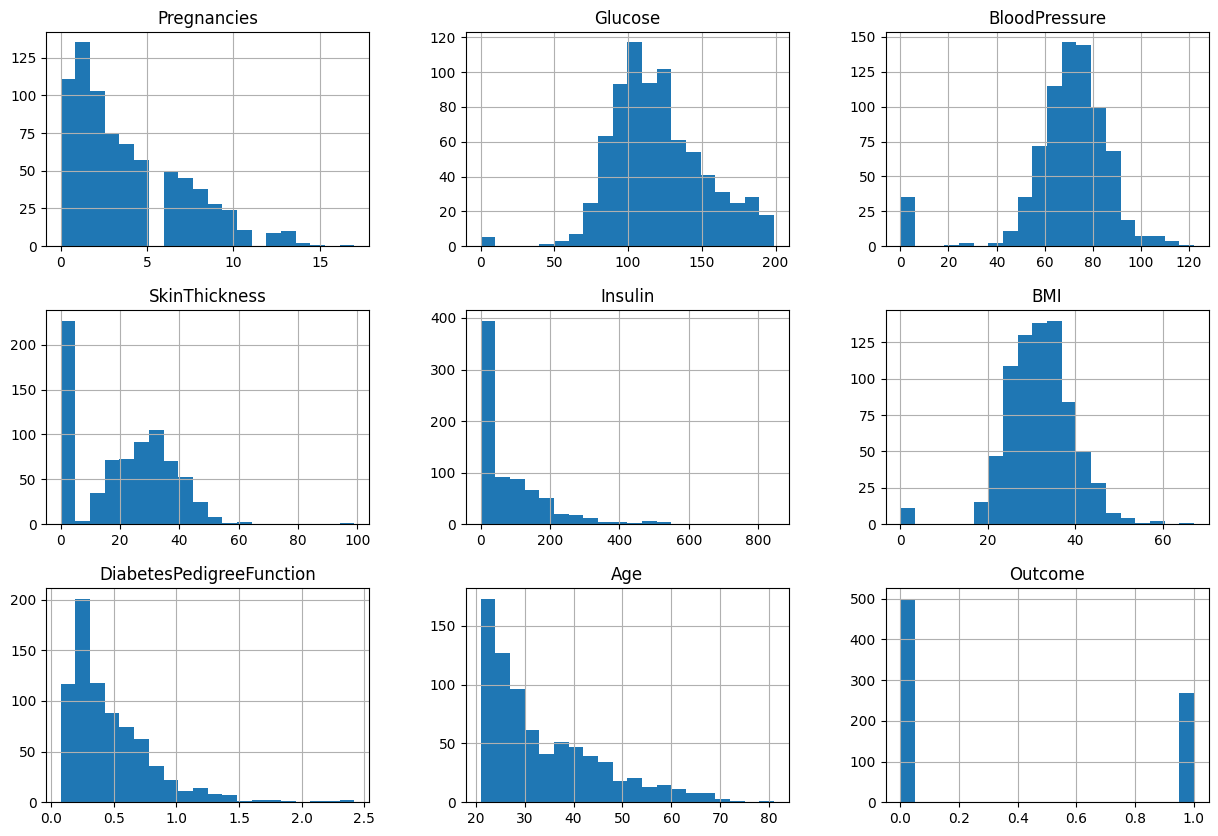

In [ ]:
# Histogram of all features
data.hist(figsize=(15, 10), bins=20)
plt.show()

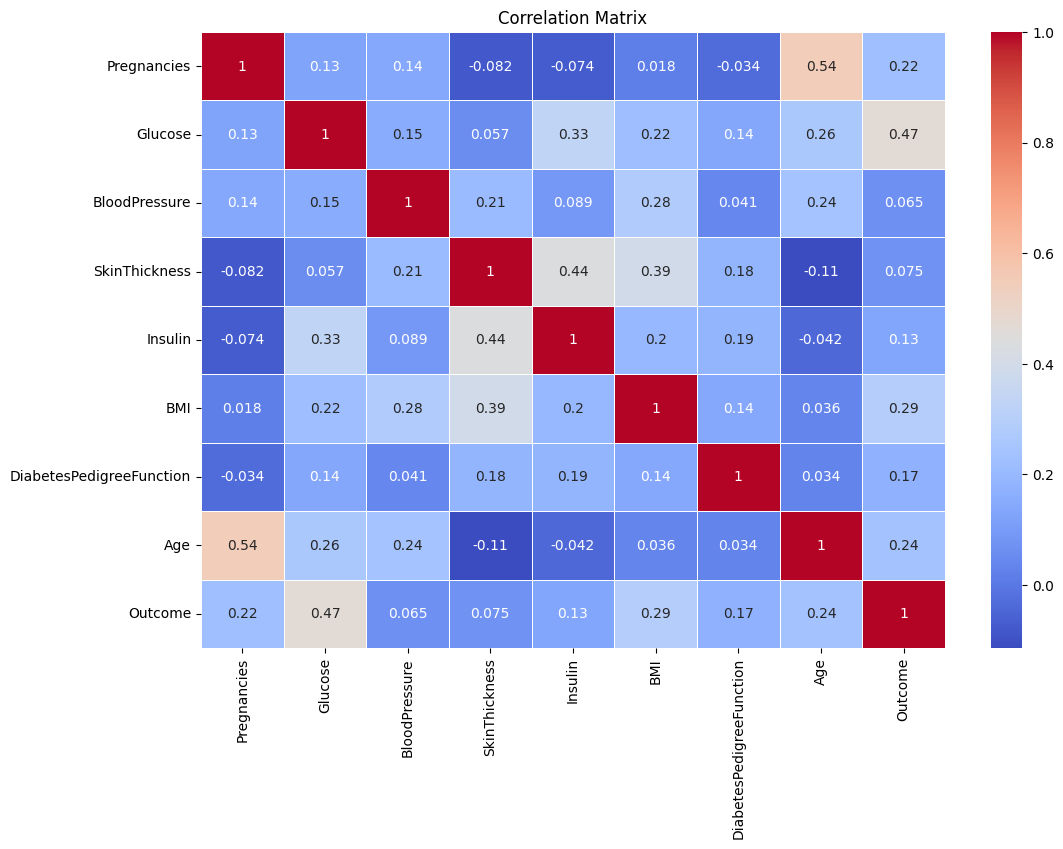

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Preprocess the dataset

In [ ]:

X = data.drop(columns=['Outcome'])
y = data['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

#### Model performance evaluate

In [ ]:

y_pred = dtr.predict(X_test)

In [ ]:
print(y_pred.shape)
print(y_pred)

(154,)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]


In [ ]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2532467532467532


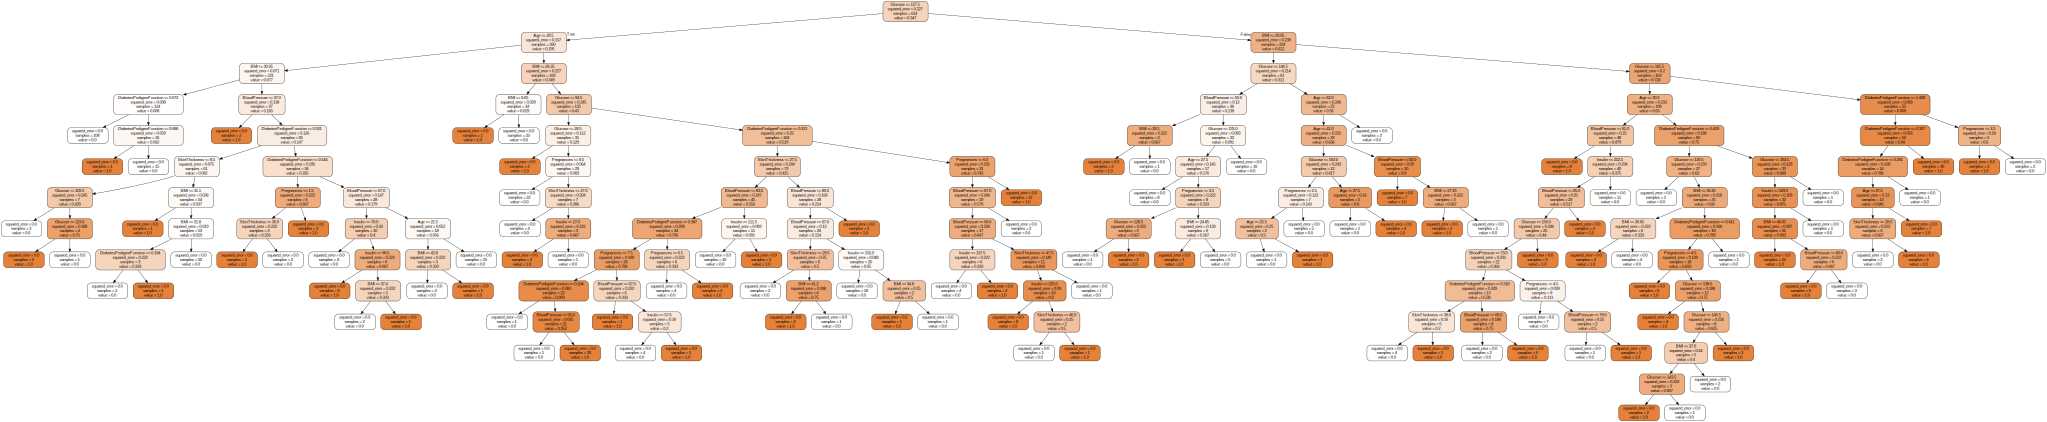

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(dtr, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph


#task 5: Use the Titanic dataset from Kaggle to build a logistic regression model to predict whether a passenger survived or not. Train the model and evaluate its performance using accuracy and confusion matrix. (Marks 20)

● Load the dataset

● Preprocess the dataset

● Build and train Logistic Regression Model

● Evaluate its performance using Accuracy and Confusion Matrix

In [ ]:
#all importtand libraris already import in above task.
titanic_df = pd.read_csv("/content/train_titanic.csv")
# titanic_df= pd.read_csv("/content/test_titanic.csv")


In [ ]:
titanic_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [ ]:
titanic_df.dropna(inplace = True)

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.duplicated().sum()

0

In [ ]:
titanic_df.drop(columns=['Name','Ticket','Cabin'], inplace = True)

In [ ]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic_df.shape

(712, 9)

#Data visulization for titanic data

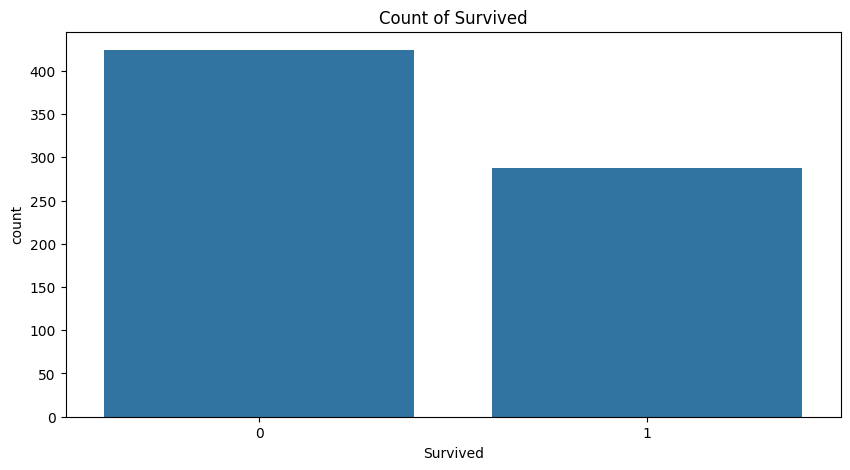

In [ ]:
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count of Survived')
plt.show()


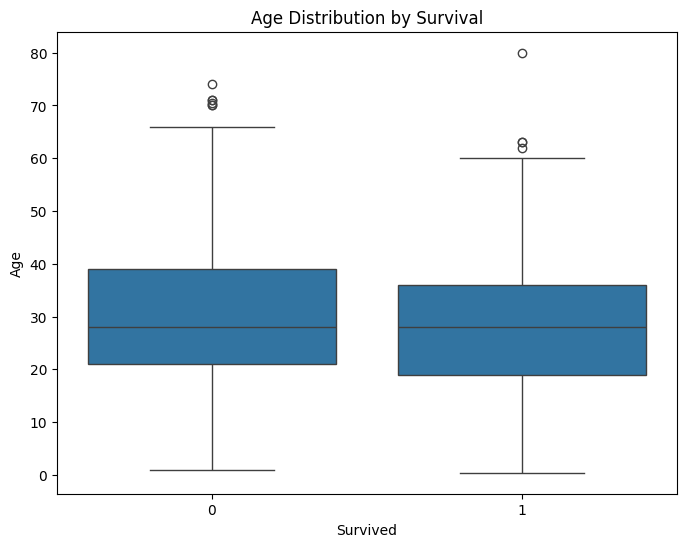

In [ ]:
# Age Boxplot by Survived
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age Distribution by Survival')
plt.show()

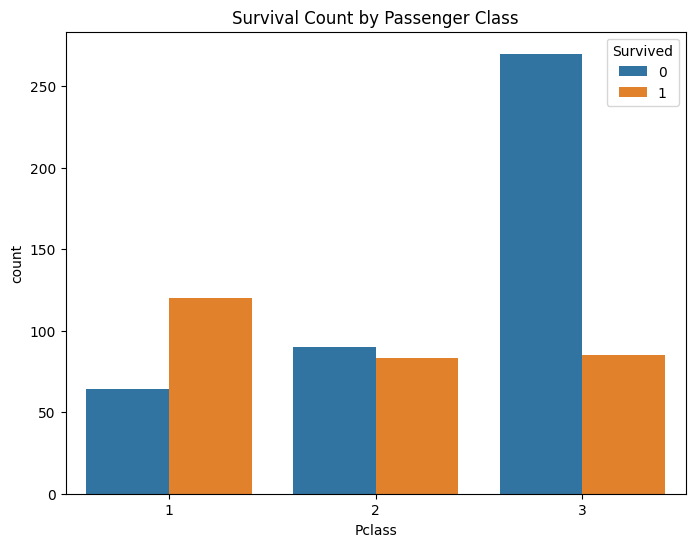

In [ ]:
# Count of Survived by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.show()


###object feature to dummy

In [ ]:

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
titanic_df.head(5)
#

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


###Split data in feature and target variable

In [ ]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# Build and train Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#model perfumance evalution

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7762237762237763
Confusion Matrix:
[[73  7]
 [25 38]]


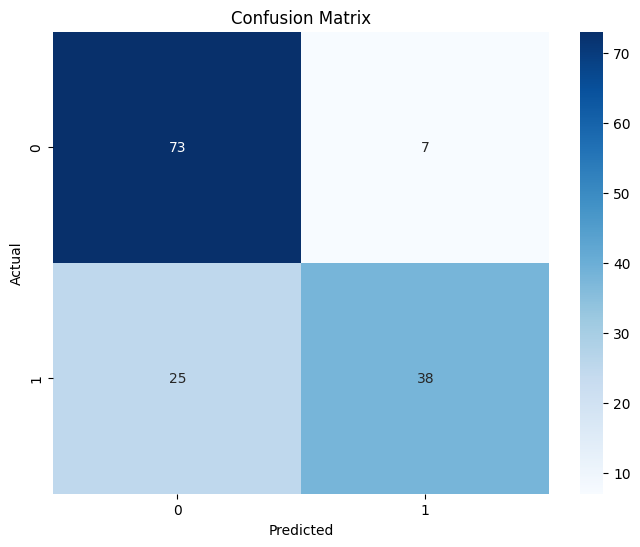

In [ ]:

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#-----------------------------------------------------------------------------
#task no 6:Use "Heart Disease Dataset | Cleaned" dataset to build a classification model topredict heart disease. (Marks 20)

Load the dataset:

Preprocess the dataset Include necessary data preprocessing steps,
 such as handling missing
values,
 encoding categorical variables, and scaling features.

Identify and separate the target variable from the dataset. The target variable indicates the presence
or absence of heart disease.
Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

Train and evaluate the following algorithms:

● Logistic Regression

● Decision Tree Classifier

● Random Forest Classifier

● Gradient Boosting Classifier

● Support Vector Machine (SVM)

For each algorithm, calculate and compare the following metrics:

● Gini Coefficient (use AUC score for
binary classification)

● Confusion Matrix

● Accuracy

● Precision

● Recall

● F1 Score

● AUC-ROC Curve

Report Findings:
Summarize the performance of each model. Discuss which model performed best based on the
evaluation metrics.

In [ ]:
heart_df = pd.read_csv("/content/heart_disease_cleaned.csv")
heart_df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
heart_df.shape

(919, 16)

In [ ]:
heart_df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

###: Basic Information and Statistics

In [ ]:
heart_df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.704853,200.791393,136.815734,0.973408,0.501632,0.993471
std,265.693391,9.429689,18.070335,109.213597,25.371260,1.120490,0.786423,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,178.500000,120.000000,0.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,224.000000,138.000000,0.800000,0.000000,1.000000
75%,689.500000,60.000000,141.210000,268.000000,156.000000,1.900000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### Check for Missing Values

In [ ]:
heart_df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
heart_df = heart_df.dropna()

In [ ]:
heart_df.duplicated().sum()

0

visualization the datset

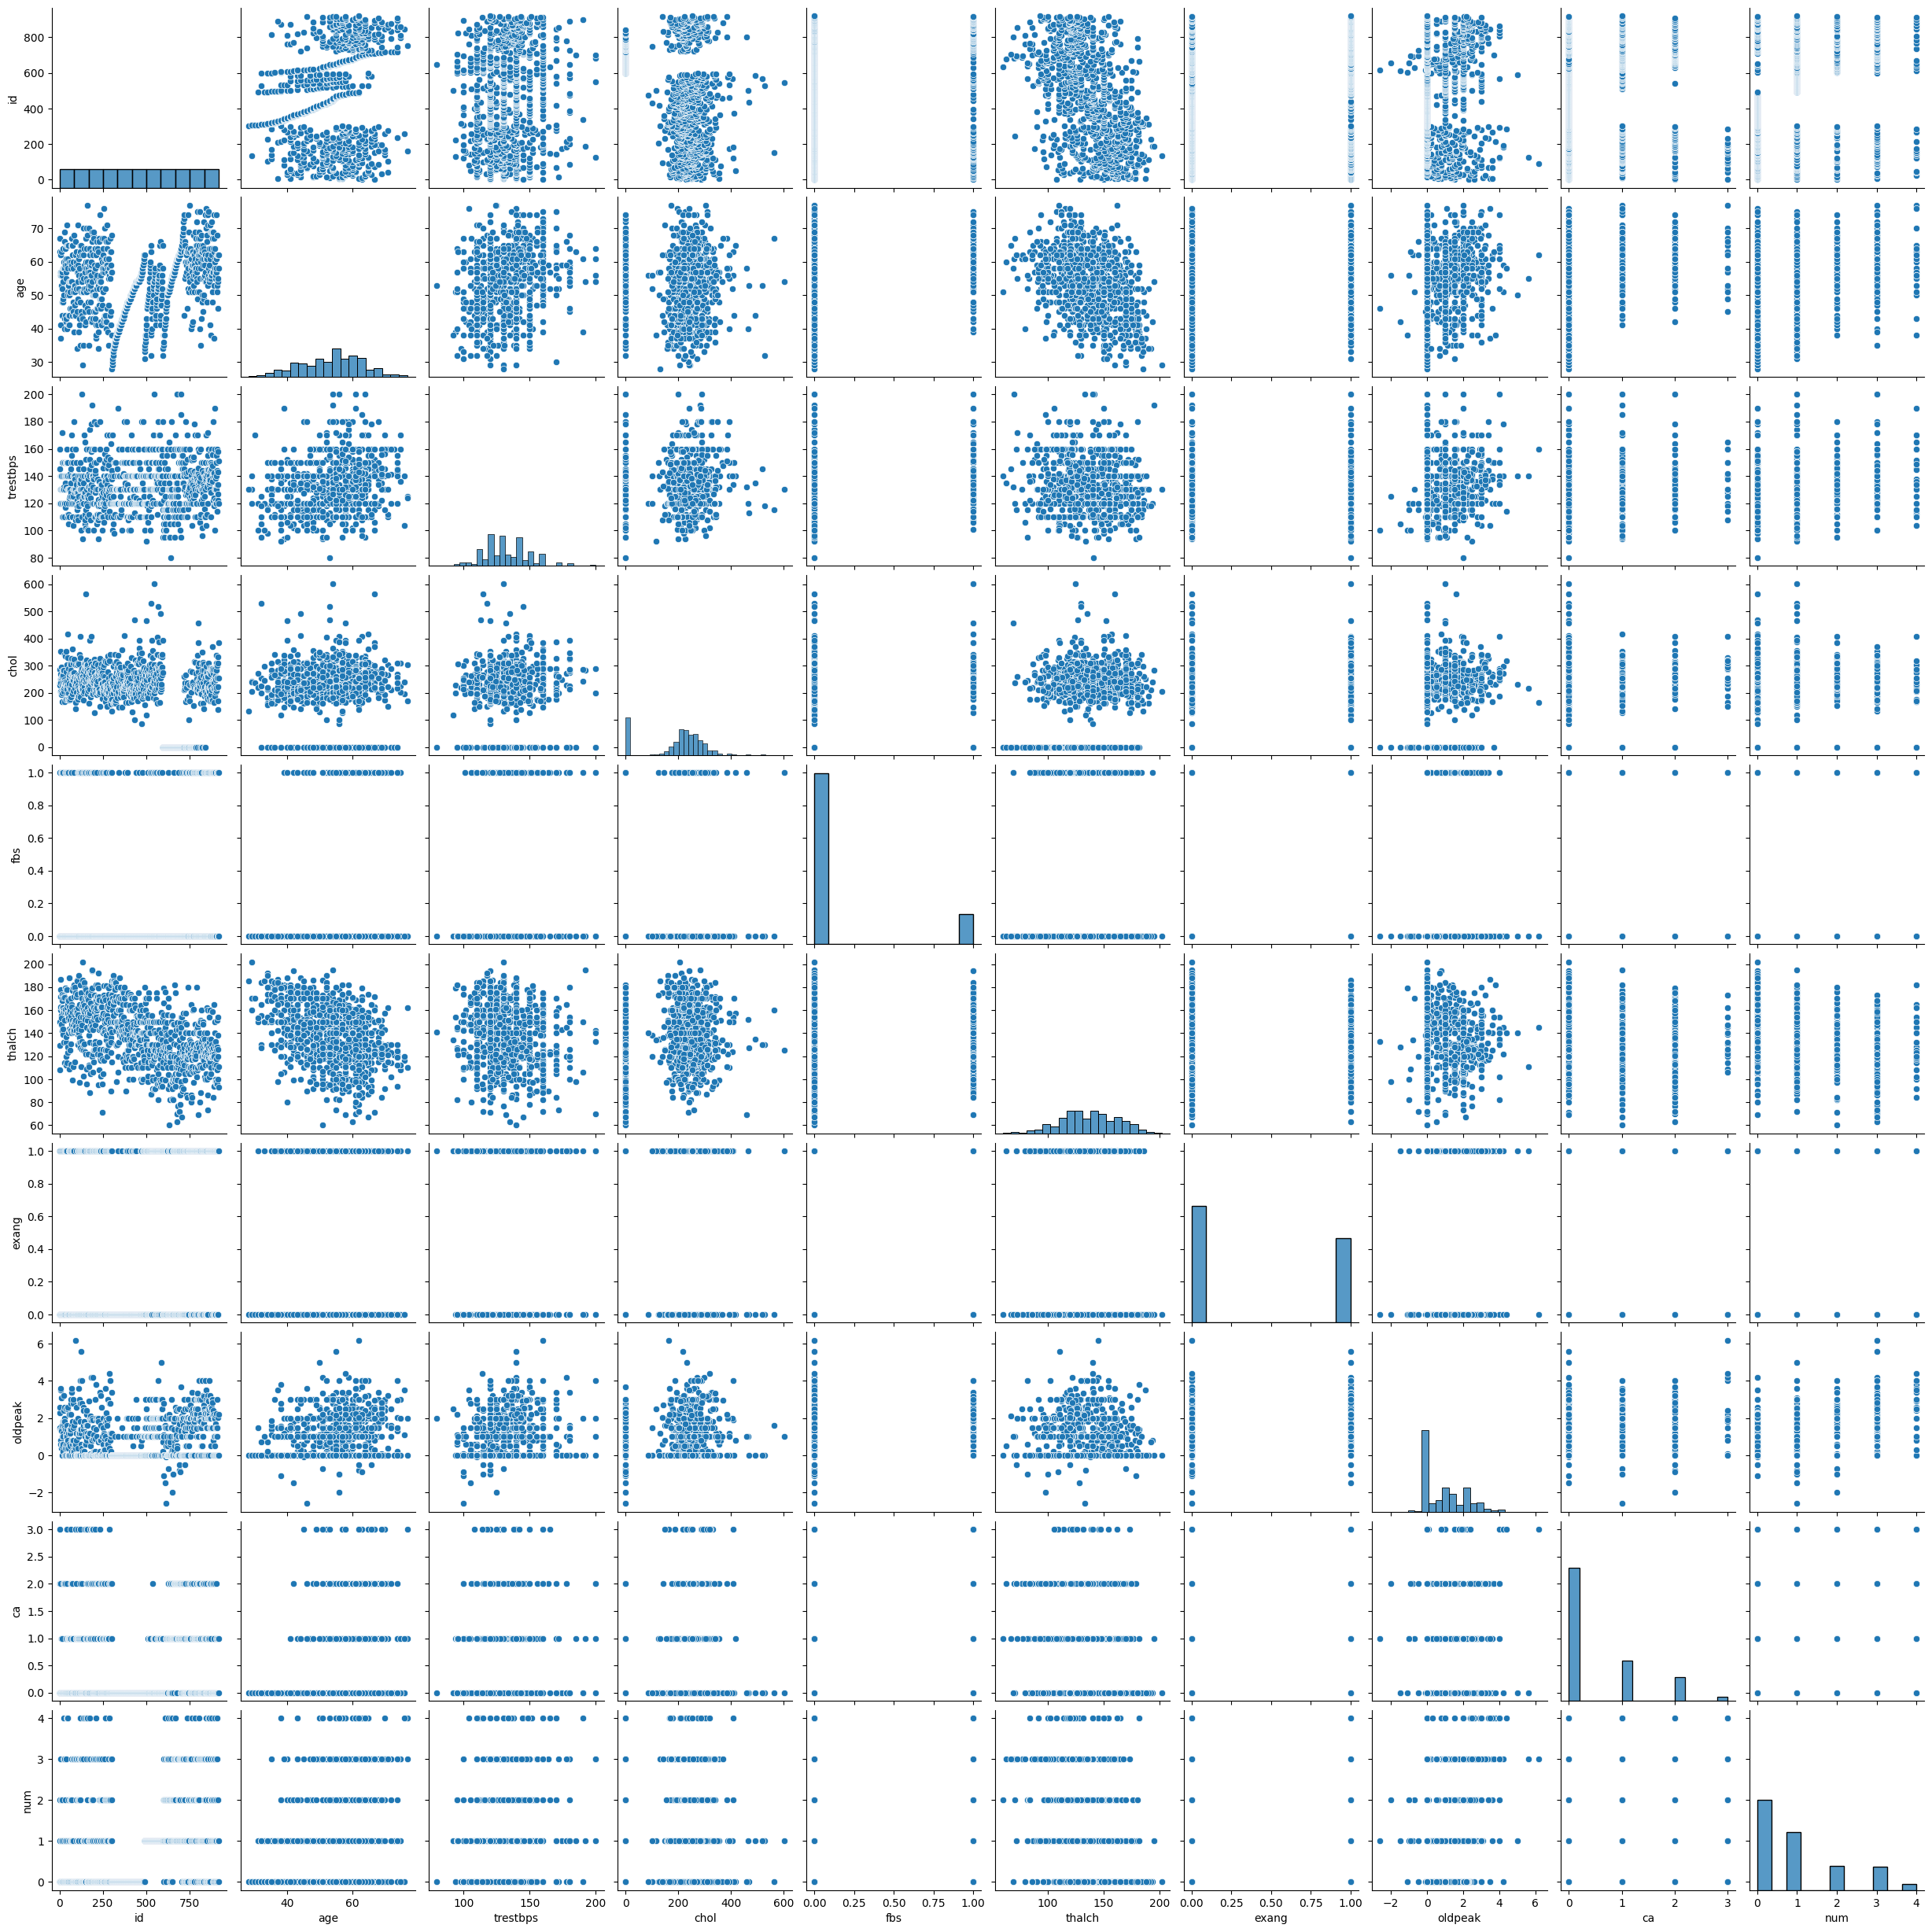

In [ ]:

# making a pairplot

plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(heart_df)
plt.show()


In [ ]:
heart_df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

#### Boxplots of numerical features by target

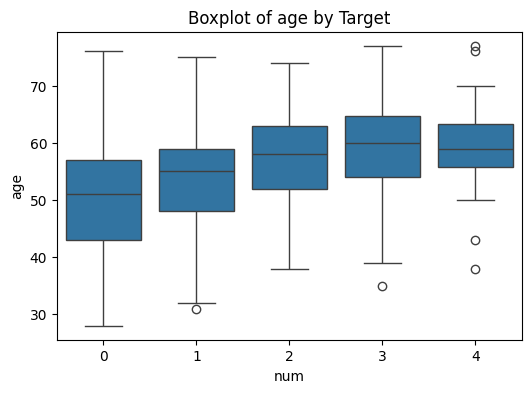

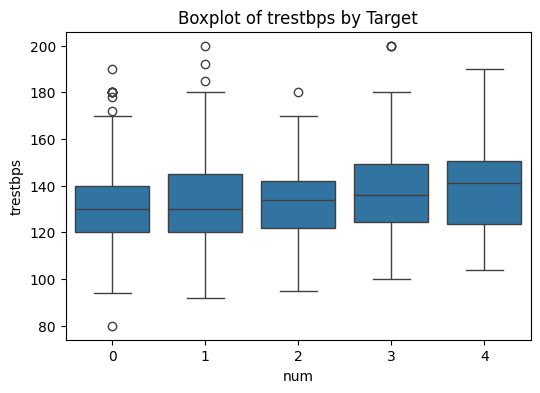

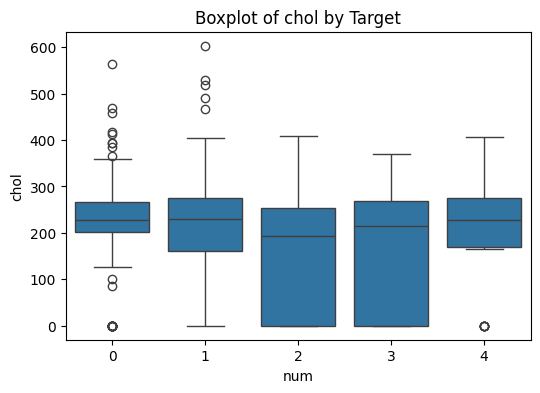

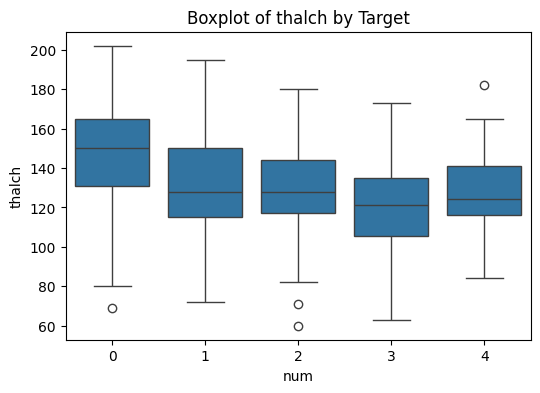

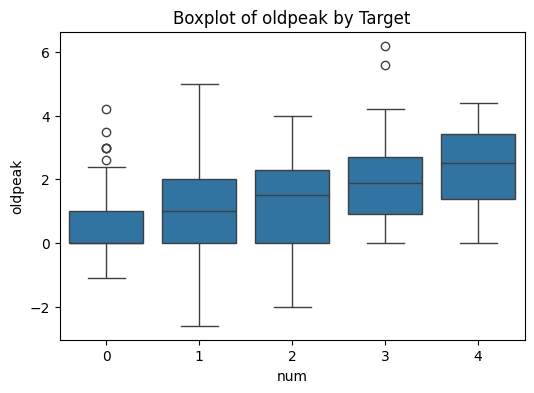

In [ ]:
# Boxplots of numerical features by target
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='num', y=feature, data=heart_df)
    plt.title(f'Boxplot of {feature} by Target')
    plt.show()

###Count Plots of Categorical Features

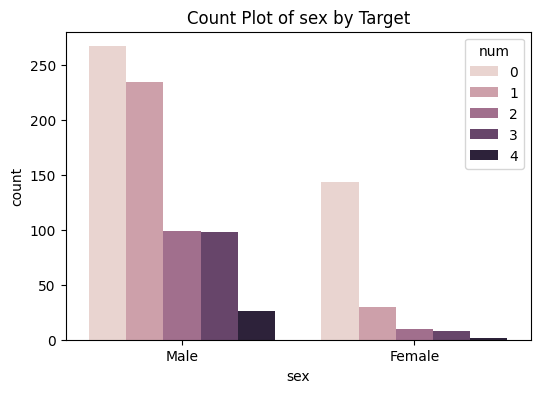

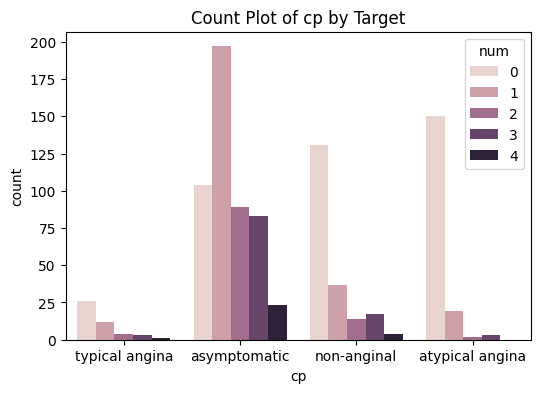

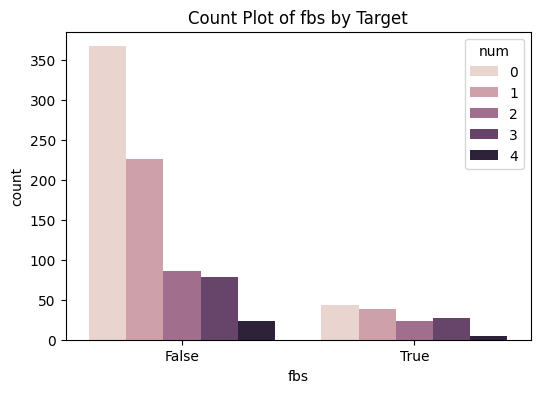

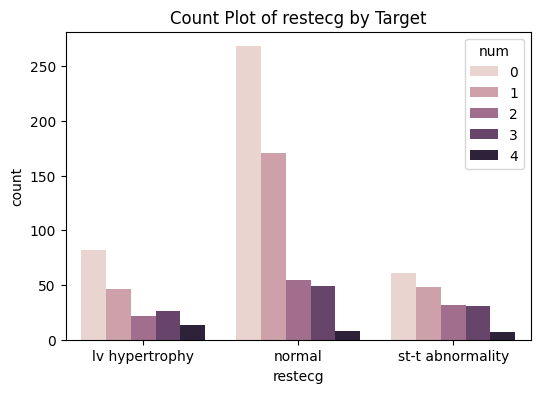

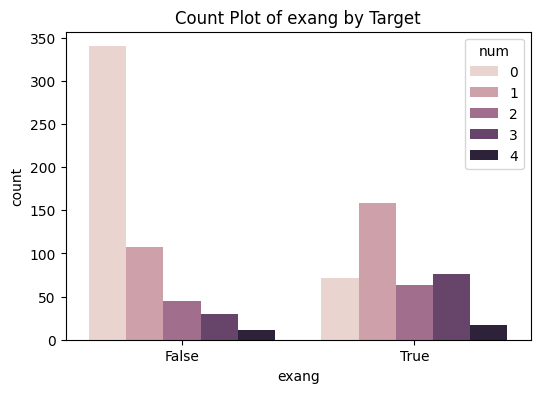

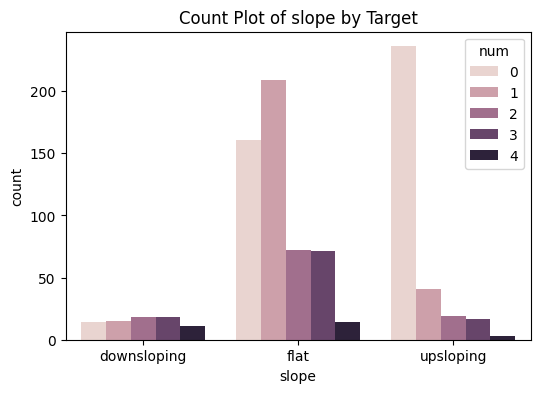

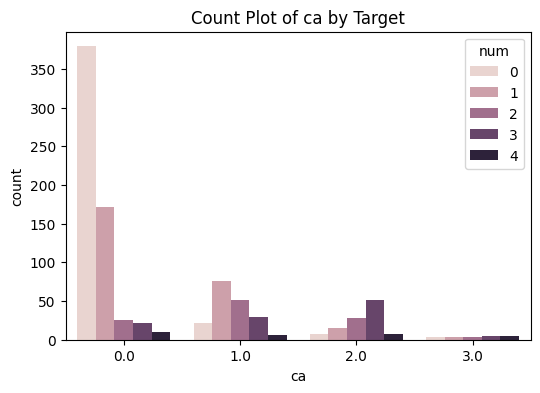

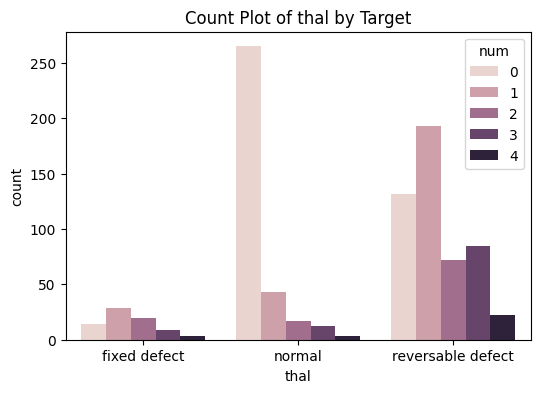

In [ ]:
# Count plots of categorical features by target
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='num', data=heart_df)
    plt.title(f'Count Plot of {feature} by Target')
    plt.show()


###Encoding Categorical Variables

In [ ]:
# Encode categorical variables using one-hot encoding
heart_df = pd.get_dummies(heart_df, drop_first=True)


In [ ]:
heart_df.head(5)

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,True,150.0,False,2.3,0.0,0,...,False,False,False,True,False,False,False,False,False,False
1,2,67,160.0,286.0,False,108.0,True,1.5,3.0,2,...,False,False,False,False,False,False,True,False,True,False
2,3,67,120.0,229.0,False,129.0,True,2.6,2.0,1,...,False,False,False,False,False,False,True,False,False,True
3,4,37,130.0,250.0,False,187.0,False,3.5,0.0,0,...,False,False,True,False,True,False,False,False,True,False
4,5,41,130.0,204.0,False,172.0,False,1.4,0.0,0,...,False,True,False,False,False,False,False,True,True,False


In [ ]:
# Separate features and target variable
X = heart_df.drop(columns=['age'])
y = heart_df['age']

#Feature Scaling

##Split the Dataset into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Output shapes of the split datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (735, 22)
Testing features shape: (184, 22)
Training labels shape: (735,)
Testing labels shape: (184,)


##Train and Evaluate Classification Algorithms

In [ ]:
from sklearn.preprocessing import StandardScaler

# # Separate the features and target variable
X = heart_df.drop(columns=['num'])
y = heart_df['num']

# # Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize a dictionary to store evaluation metrics for each algorithm
evaluation_metrics = {}

# Initialize a StandardScaler object and fit to training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train and evaluate the following algorithms:

● Logistic Regression

● Decision Tree Classifier

● Random Forest Classifier

● Gradient Boosting Classifier

● Support Vector Machine (SVM

Logistic regression

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Convert the target variable to categorical if it is continuous
y_train = y_train.astype('int').astype('category')  # Convert to int first, then to category
y_test = y_test.astype('int').astype('category')   # Convert to int first, then to category

# Now fit the model
LR_model = LogisticRegression(penalty='l1', solver='liblinear')
LR_model.fit(X_train_scaled, y_train)
LR_predictions = LR_model.predict(X_test_scaled)
LR_proba = LR_model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np # Import numpy for mean calculation

# Logistic Regression
LR_model = LogisticRegression(penalty='l1', solver='liblinear')
LR_model.fit(X_train_scaled, y_train)
LR_predictions = LR_model.predict(X_test_scaled)
LR_proba = LR_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(LR_proba.shape[1]):
    class_proba = LR_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique((y_test == class_label).astype(int))) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
    else:
        print(f"Warning: Class {class_label} is not present in y_test or has only one unique value. Skipping Gini calculation.")

# Average the Gini coefficients across all classes (excluding those skipped)
if gini_coefficients:  # Check if any Gini coefficients were calculated
    average_gini_coefficient = np.mean(list(gini_coefficients.values()))
    print("Average Gini Coefficient:", average_gini_coefficient)
else:
    print("No Gini coefficients could be calculated due to single-class issues.")

Average Gini Coefficient: -0.25887122587408484


In [ ]:
# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, LR_predictions)
accuracy = accuracy_score(y_test, LR_predictions)
precision = precision_score(y_test, LR_predictions, average='weighted')
recall = recall_score(y_test, LR_predictions, average='weighted')
f1 = f1_score(y_test, LR_predictions, average='weighted')

# Store evaluation metrics in a dictionary
LR_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['Logistic Regression'] = LR_metrics

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression:")
for metric_name, metric_value in LR_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Logistic Regression:
Confusion Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.07608695652173914
Precision: 0.04748757432181345
Recall: 0.07608695652173914
F1 Score: 0.053379232127633666
Gini Coefficients: {'Class 29': -0.7377049180327868, 'Class 30': 0.7814207650273224, 'Class 32': -0.09340659340659341, 'Class 33': -0.9890710382513661, 'Class 34': -0.5322283609576428, 'Class 35': 0.13736263736263754, 'Class 36': -0.7267759562841529, 'Class 37': 0.20810313075506448, 'Class 38': -0.6027777777777777, 'Class 39': -0.4167597765363128, 'Class 40': -0.1428571428571429, 'Class 41': -0.4301675977653632, 'Class 42': -0.4569832402234637, 'Class 43': -0.18212290502793294, 'Class 44': -0.8360655737704918, 'Class 45': -0.18232044198895037, 'Class 46': 0.05555555555555558, 'Class 47': 0.4361111111111111, 'Class 48': -0.2078651685393258}
Average Gini Coefficient: -0.25887122587408484


##DecisionTreeCLassifier

In [ ]:

dtc_model = DecisionTreeClassifier(max_depth=5, min_samples_split=30, min_samples_leaf=20)
dtc_model.fit(X_train_scaled, y_train)
dtc_predictions = dtc_model.predict(X_test_scaled)
dtc_proba = dtc_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(dtc_proba.shape[1]):
    class_proba = dtc_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique(y_test == class_label)) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
    else:
        gini_coefficients[f'Class {class_label}'] = "Not Defined (Only one class present)"
        print(f"Warning: Gini coefficient for Class {class_label} not defined due to only one class present in y_test.")

# Average the Gini coefficients across all classes (excluding undefined ones)
defined_gini_values = [v for v in gini_coefficients.values() if isinstance(v, (int, float))]
average_gini_coefficient = np.mean(defined_gini_values) if defined_gini_values else "Not Defined"

In [ ]:
# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, dtc_predictions)
accuracy = accuracy_score(y_test, dtc_predictions)
precision = precision_score(y_test, dtc_predictions, average='weighted')
recall = recall_score(y_test, dtc_predictions, average='weighted')
f1 = f1_score(y_test, dtc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
dtc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['DecisionTreeClassifier'] = dtc_metrics

# Print evaluation metrics
print("Evaluation Metrics for Decision Tree Classifier:")
for metric_name, metric_value in dtc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Decision Tree Classifier:
Confusion Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.10326086956521739
Precision: 0.11510261949770456
Recall: 0.10326086956521739
F1 Score: 0.0798716050064321
Gini Coefficients: {'Class 0': 'Not Defined (Only one class present)', 'Class 1': 'Not Defined (Only one class present)', 'Class 2': 'Not Defined (Only one class present)', 'Class 3': 'Not Defined (Only one class present)', 'Class 4': 'Not Defined (Only one class present)', 'Class 5': 'Not Defined (Only one class present)', 'Class 6': 'Not Defined (Only one class present)', 'Class 7': 'Not Defined (Only one class present)', 'Class 8': 'Not Defined (Only one class present)', 'Class 9': 'Not Defined (Only one class present)', 'Class 10': 'Not Defined (Only one class present)', 'Class 11': 'Not Defined (Only one class present)', 'Class 12': 'Not Defined (Only one class present)', 'Class 13

# RandomForestRegressor

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
rfc_model.fit(X_train_scaled, y_train)
rfc_predictions = rfc_model.predict(X_test_scaled)
rfc_proba = rfc_model.predict

In [ ]:
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
rfc_model.fit(X_train_scaled, y_train)
rfc_predictions = rfc_model.predict(X_test_scaled)
rfc_proba = rfc_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(rfc_proba.shape[1]):
    class_proba = rfc_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique(y_test == class_label)) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
    else:
        gini_coefficients[f'Class {class_label}'] = "Not Defined (Only one class present)"
        print(f"Warning: Gini coefficient for Class {class_label} not defined due to only one class present in y_test.")

# Average the Gini coefficients across all classes (excluding undefined ones)
defined_gini_values = [v for v in gini_coefficients.values() if isinstance(v, (int, float))]
average_gini_coefficient = np.mean(defined_gini_values) if defined_gini_values else "Not Defined"

In [ ]:
# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, rfc_predictions)
accuracy = accuracy_score(y_test, rfc_predictions)
precision = precision_score(y_test, rfc_predictions, average='weighted')
recall = recall_score(y_test, rfc_predictions, average='weighted')
f1 = f1_score(y_test, rfc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
rfc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['RandomForestClassifier'] = rfc_metrics

# Print evaluation metrics
print("Evaluation Metrics for Random Forest Classifier:")
for metric_name, metric_value in rfc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Random Forest Classifier:
Confusion Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.10326086956521739
Precision: 0.08257387741083393
Recall: 0.10326086956521739
F1 Score: 0.0753143670942584
Gini Coefficients: {'Class 0': 'Not Defined (Only one class present)', 'Class 1': 'Not Defined (Only one class present)', 'Class 2': 'Not Defined (Only one class present)', 'Class 3': 'Not Defined (Only one class present)', 'Class 4': 'Not Defined (Only one class present)', 'Class 5': 'Not Defined (Only one class present)', 'Class 6': 'Not Defined (Only one class present)', 'Class 7': 'Not Defined (Only one class present)', 'Class 8': 'Not Defined (Only one class present)', 'Class 9': 'Not Defined (Only one class present)', 'Class 10': 'Not Defined (Only one class present)', 'Class 11': 'Not Defined (Only one class present)', 'Class 12': 'Not Defined (Only one class present)', 'Class 13

#GRadientBoosting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Gradient Boosting Classifier

gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1.0)
gbc_model.fit(X_train_scaled, y_train)
gbc_predictions = gbc_model.predict(X_test_scaled)
gbc_proba = gbc_model.predict_proba(X_test_scaled)

# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class
for class_label in range(gbc_proba.shape[1]):
    class_proba = gbc_proba[:, class_label]
    # Check if both classes are present for this label
    if len(np.unique(y_test == class_label)) == 2:
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1
else:
        gini_coefficients[f'Class {class_label}'] = "Not Defined (Only one class present)"
        print(f"Warning: Gini coefficient for Class {class_label} not defined due to only one class present in y")

In [ ]:

# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, rfc_predictions)
accuracy = accuracy_score(y_test, rfc_predictions)
precision = precision_score(y_test, gbc_predictions, average='weighted')
recall = recall_score(y_test, gbc_predictions, average='weighted')
f1 = f1_score(y_test, gbc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
gbc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Gini Coefficients': gini_coefficients,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['GradientBoostingClassifier'] = gbc_metrics

# Print evaluation metrics
print("Evaluation Metrics for Gradient Boosting Classifier:")
for metric_name, metric_value in gbc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for Gradient Boosting Classifier:
Confusion Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.10326086956521739
Precision: 0.30104216435738174
Recall: 0.22826086956521738
F1 Score: 0.23757741530279897
Gini Coefficients: {'Class 29': -0.9562841530054644, 'Class 30': 0.7486338797814207, 'Class 32': -0.9230769230769231, 'Class 33': -0.9234972677595628, 'Class 34': -0.7790055248618785, 'Class 35': -0.24725274725274726, 'Class 36': -0.7923497267759563, 'Class 37': -0.278084714548803, 'Class 38': -0.11944444444444446, 'Class 39': -0.26927374301675966, 'Class 40': 0.016483516483516425, 'Class 41': -0.13296089385474863, 'Class 42': -0.14413407821229052, 'Class 43': 0.007821229050279488, 'Class 44': -0.5737704918032787, 'Class 45': -0.2117863720073665, 'Class 46': -0.15000000000000002, 'Class 47': 0.125, 'Class 48': 'Not Defined (Only one class present)'}
Average Gini Coefficient: -0.328

#SVM

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svc_model = SVC(C=1.0, kernel='rbf', gamma='scale')

# Train the model
svc_model.fit(X_train_scaled, y_train)

# Make predictions
svc_predictions = svc_model.predict(X_test_scaled)
# svc_proba = svc_model.predict_proba(X_test_scaled)
# Initialize a dictionary to store the Gini coefficients for each class
gini_coefficients = {}

# Calculate the Gini coefficient for each class (if probability estimates are available)
if hasattr(svc_model, "predict_proba"):
    svc_proba = svc_model.predict_proba(X_test_scaled)
    for class_label in range(svc_proba.shape[1]):
        class_proba = svc_proba[:, class_label]
        gini_coefficients[f'Class {class_label}'] = roc_auc_score((y_test == class_label).astype(int), class_proba) * 2 - 1

    # Average the Gini coefficients across all classes
    average_gini_coefficient = np.mean(list(gini_coefficients.values()))
else:
    average_gini_coefficient = None

# Compute other evaluation metrics
conf_matrix = confusion_matrix(y_test, svc_predictions)
accuracy = accuracy_score(y_test, svc_predictions)
precision = precision_score(y_test, svc_predictions, average='weighted')
recall = recall_score(y_test, svc_predictions, average='weighted')
f1 = f1_score(y_test, svc_predictions, average='weighted')

# Store evaluation metrics in a dictionary
svc_metrics = {
    'Confusion Matrix': conf_matrix,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Average Gini Coefficient': average_gini_coefficient
}

# Store metrics in the evaluation dictionary
evaluation_metrics['SVM'] = svc_metrics

# Print evaluation metrics
print("Evaluation Metrics for SVM:")
for metric_name, metric_value in svc_metrics.items():
    print(f"{metric_name}: {metric_value}")

Evaluation Metrics for SVM:
Confusion Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.07065217391304347
Precision: 0.045136156469276684
Recall: 0.07065217391304347
F1 Score: 0.044218207197746835
Average Gini Coefficient: None


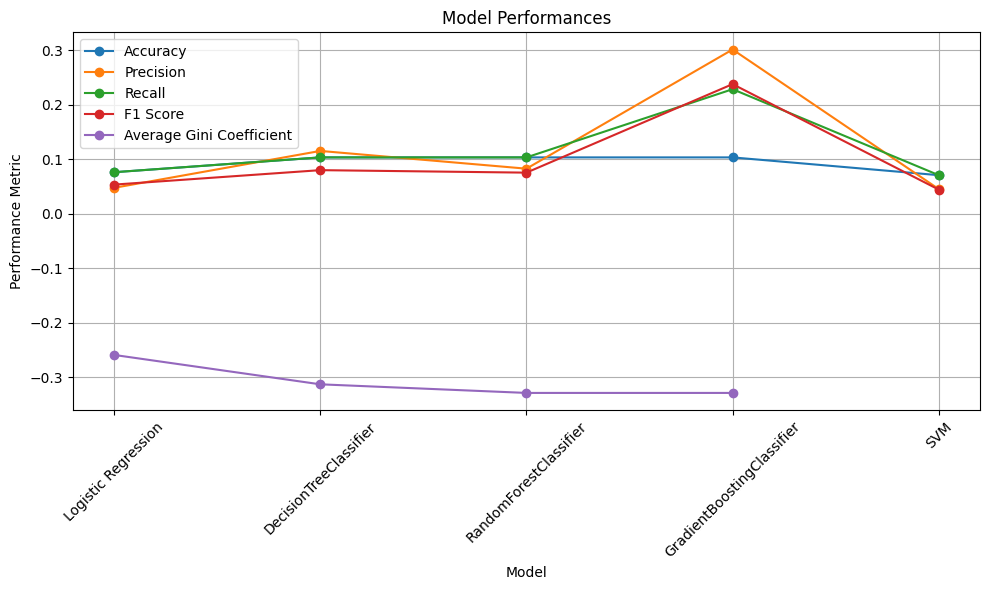

In [ ]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store model performances
model_performance = {}

# Loop through each model's evaluation metrics
for model_name, metrics in evaluation_metrics.items():
    model_performance[model_name] = {
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1 Score': metrics['F1 Score'],
        'Average Gini Coefficient': metrics.get('Average Gini Coefficient', None)
    }

# Extract model names and metrics
models = list(model_performance.keys())
metrics = list(model_performance[models[0]].keys())

# Plot model performances using lines
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a separate line
for metric_name in metrics:
    values = [model_performance[model_name][metric_name] for model_name in models]
    ax.plot(models, values, marker='o', label=metric_name)

# Add labels and legend
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric')
ax.set_title('Model Performances')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()